In [1]:
#import files for analysis

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cereal.csv to cereal.csv
User uploaded file "cereal.csv" with length 5059 bytes


In [0]:
#Import needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
# Import and subset dataset into hot/cold cereals 
cereals = pd.read_csv("cereal.csv")
cereals.describe() # Describe will show content 

hot = cereals.loc[cereals['type'] == "H"] # To identify Hot cereals
cold = cereals.loc[cereals['type'] == "C"] # To identify cold cereals

count    3.000000
mean     0.666667
std      2.081666
min     -1.000000
25%     -0.500000
50%      0.000000
75%      1.500000
max      3.000000
Name: sugars, dtype: float64

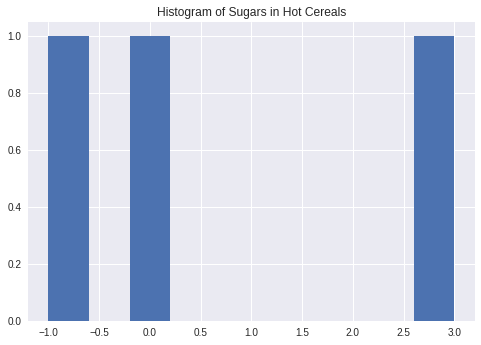

In [4]:
# Histogram of hot cereals' sugar content
import matplotlib.pyplot as plt
plt.hist(hot["sugars"])
plt.title("Histogram of Sugars in Hot Cereals")

# Let's get the text output. Turns out Quaker has a -1 for some reason. 
hot["sugars"].describe()

count    74.000000
mean      7.175676
std       4.333236
min       0.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      15.000000
Name: sugars, dtype: float64

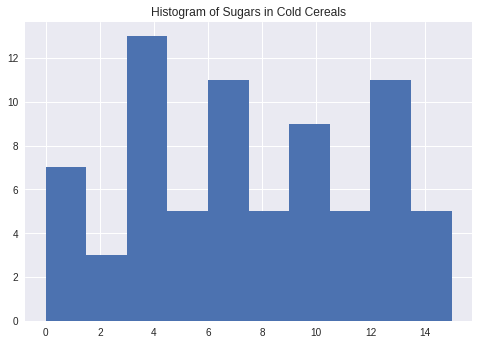

In [5]:
# Histogram of cold cereals' sugar content
plt.hist(cold["sugars"])
plt.title("Histogram of Sugars in Cold Cereals")

# Let's get the text output. Turns out Quaker has a -1 for some reason. 
cold["sugars"].describe()

count    23.000000
mean      7.565217
std       4.500768
min       0.000000
25%       3.000000
50%       7.000000
75%      12.000000
max      15.000000
Name: sugars, dtype: float64

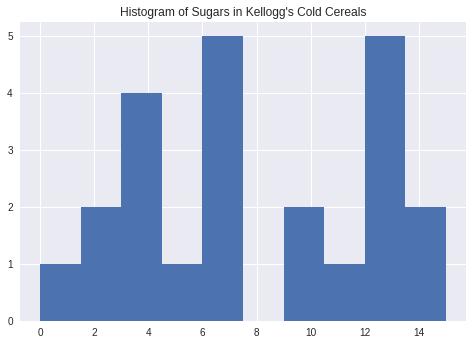

In [7]:
# We can't exactly do a t-test with one group with 3 cereals and one group with 74 (totes unfair)
# So let's try a new subset - Kellogg vs. General Mills cold cereals!

kellogg = cold.loc[cold['mfr'] == "K"]
generalmills = cold.loc[cold['mfr'] == "G"]

# Kellogg has 24 cold cereals
plt.hist(kellogg["sugars"])
plt.title("Histogram of Sugars in Kellogg's Cold Cereals")

kellogg["sugars"].describe()

count    22.000000
mean      7.954545
std       3.872704
min       1.000000
25%       3.750000
50%       8.500000
75%      10.000000
max      14.000000
Name: sugars, dtype: float64

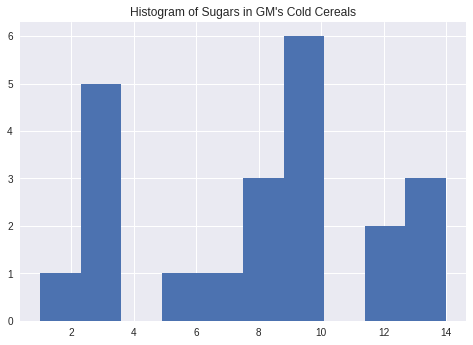

In [8]:
# General Mills has 22 cold cereals
plt.hist(generalmills["sugars"])
plt.title("Histogram of Sugars in GM's Cold Cereals")

generalmills["sugars"].describe()

In [9]:
# Now we can do the t-test. I'm going to predict no differences, becasue the
# histograms look similar in both groups.

#scipy.stats import ttest_ind didn't work. But this did...probably needed the whole package

from scipy import stats
stats.ttest_ind(kellogg["sugars"],generalmills["sugars"])

# p = 0.75! No difference.

Ttest_indResult(statistic=-0.3104122557192147, pvalue=0.7577470989748843)